In [175]:
## Import stuff
 
import numpy as np
from sklearn import datasets, linear_model, metrics
import matplotlib.pyplot as plt

In [176]:
## Load the diabetes dataset
diabetes = datasets.load_diabetes()
diabetes_X = diabetes.data # matrix of dimensions 442x10
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]





In [177]:
# train
X = diabetes_X_train
y = diabetes_y_train
 
# train: init
W = np.zeros((X.shape[1],1))

b = 0

cost_train=[]
itera_train=[]

learning_rate = 0.1
epochs = 10001

n = X.shape[1]
m = X.shape[0]
one_column = np.ones((X.shape[0],1))
X = np.concatenate((one_column, X), axis = 1)
 # initializing the parameter vector...
theta = np.ones((n+1,1))
y=y.reshape(m,1)

 
# train: gradient descent
for i in range(epochs):
    # calculate predictions
    pred = X.dot(theta)
    

    
    # calculate error and cost (mean squared error)
    
    mean_squared_error = ((pred-y).transpose().dot(pred-y))/(2*m)
    
    cost_train.append(mean_squared_error[0,0])
    itera_train.append(i)
   

 
    # calculate gradients
    gradient = (1/m)*X.transpose().dot(pred-y)
 
    # update parameters
    theta=theta-learning_rate*gradient
    

    

 
    # diagnostic output
    if i % 500 == 0: print("Epoch %d: %f" % (i, mean_squared_error))
        


Epoch 0: 14571.937953
Epoch 500: 2296.985427
Epoch 1000: 1980.262446
Epoch 1500: 1815.208387
Epoch 2000: 1719.295237
Epoch 2500: 1657.484974
Epoch 3000: 1614.286167
Epoch 3500: 1582.395930
Epoch 4000: 1558.049642
Epoch 4500: 1539.091619
Epoch 5000: 1524.155537
Epoch 5500: 1512.302071
Epoch 6000: 1502.848290
Epoch 6500: 1495.280053
Epoch 7000: 1489.202193
Epoch 7500: 1484.307241
Epoch 8000: 1480.354156
Epoch 8500: 1477.153036
Epoch 9000: 1474.553728
Epoch 9500: 1472.437167
Epoch 10000: 1470.708710


Text(0, 0.5, 'mean_squared error/(cost function)')

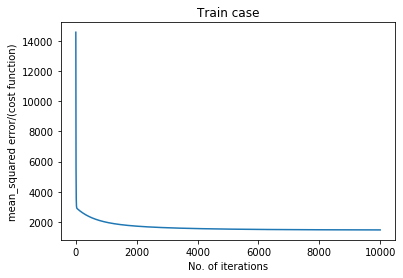

In [182]:
plt.plot(itera_train,cost_train)
plt.title('Train case')
plt.xlabel('No. of iterations')
plt.ylabel('mean_squared error/(cost function)')

In [173]:
# test
X = diabetes_X_test
y = diabetes_y_test
 
n = X.shape[1]
m = X.shape[0]
one_column = np.ones((X.shape[0],1))
X = np.concatenate((one_column, X), axis = 1)
 # initializing the parameter vector...
theta = np.ones((n+1,1))
y=y.reshape(m,1)

cost=[]
itera=[]


# calculate predictions + calculate error and cost (same code as above)
for i in range(epochs):
    # calculate predictions
    pred = X.dot(theta)
    

    
    # calculate error and cost (mean squared error)
    
#     mean_squared_error = ((pred-y).transpose().dot(pred-y))/(2*m)
    mean_squared_error = sum((pred-y)**2)/(2*m)
    
#     cost.append(mean_squared_error[0,0])
    cost.append(mean_squared_error)
    itera.append(i)

 
    # calculate gradients
    gradient = (1/m)*X.transpose().dot(pred-y)
 
    # update parameters
    theta=theta-learning_rate*gradient
    

W=theta[1:]
b=theta[0]

print('Coefficients: \n', W)
print("Mean squared error: %.2f" % mean_squared_error)
print("="*120)

Coefficients: 
 [[-248.8061652 ]
 [-142.94989217]
 [ 545.14667992]
 [ 217.70931509]
 [  61.07750122]
 [ -90.6622631 ]
 [-180.55485205]
 [  26.58799439]
 [ 570.35386175]
 [  77.55675305]]
Mean squared error: 757.94


Text(0, 0.5, 'mean_squared error/(cost function)')

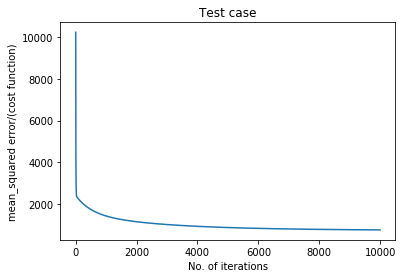

In [181]:
plt.plot(itera,cost)
plt.title('Test case')
plt.xlabel('No. of iterations')
plt.ylabel('mean_squared error/(cost function)')